In [ ]:
from collections import Counter
from sklearn.datasets import make_classification


In [ ]:
X,y = make_classification(n_samples=10000, n_features=2, n_redundant=0, weights=[0.99], n_clusters_per_class=1, random_state=42)

In [ ]:
# Counting the datapoints
Counter(y)

Counter({np.int64(0): 9859, np.int64(1): 141})

<Axes: xlabel='0', ylabel='1'>

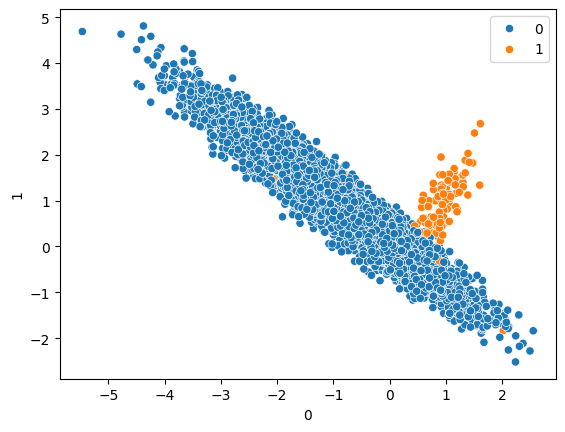

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [9]:
# train test split the data
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [10]:
# hyperparameter tuning the Model 
# using class_weight - class weights will help us give more importace to the categories that are available in less quantity.
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
penalty = ['l1','l2','elasticnet']
c_values = [100,10,0.1,1,0.01]
solver = ['newton-cg','lbfgs','sag','saga','liblinear']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [26]:
class_weight

[{0: 1, 1: 1},
 {0: 1, 1: 10},
 {0: 1, 1: 50},
 {0: 1, 1: 100},
 {0: 10, 1: 1},
 {0: 10, 1: 10},
 {0: 10, 1: 50},
 {0: 10, 1: 100},
 {0: 50, 1: 1},
 {0: 50, 1: 10},
 {0: 50, 1: 50},
 {0: 50, 1: 100},
 {0: 100, 1: 1},
 {0: 100, 1: 10},
 {0: 100, 1: 50},
 {0: 100, 1: 100}]

In [14]:
# Train the model
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
params = dict(penalty= penalty, C=c_values, solver=solver, class_weight=class_weight)

In [13]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 0.1, 1, 0.01],
 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [15]:
# hyperparameter tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', n_jobs=-1, cv=cv)

In [21]:
import warnings
warnings.filterwarnings('ignore')

grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 0.1, 1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga',
                                    'liblinear']},
             scoring='accuracy')

In [22]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)

LogisticRegression(C=0.1, class_weight={0: 1, 1: 10}, penalty='l1',
                   solver='saga')
{'C': 0.1, 'class_weight': {0: 1, 1: 10}, 'penalty': 'l1', 'solver': 'saga'}
0.9953333333333333


In [24]:
y_pred_grid = grid.predict(X_test)
y_pred_grid

array([0, 0, 0, ..., 0, 0, 0], shape=(2500,))

In [25]:
# Performance matrices 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

acc_score = accuracy_score(y_test,y_pred_grid)
con_matrix = confusion_matrix(y_test,y_pred_grid)
report = classification_report(y_test,y_pred_grid)
print(f"Accuracy of the model : {acc_score}")
print(f"Classification report : \n{report}")
print(f"Confusion matrix is given by : \n{con_matrix}")

Accuracy of the model : 0.994
Classification report : 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2457
           1       0.97      0.67      0.79        43

    accuracy                           0.99      2500
   macro avg       0.98      0.84      0.90      2500
weighted avg       0.99      0.99      0.99      2500

Confusion matrix is given by : 
[[2456    1]
 [  14   29]]
